ibmqfactory.load_account:WARNING:2023-11-18 14:53:36,924: Credentials are already in use. The existing account in the session will be replaced.


num_quibits 24
iterations 1
{   'assignment': '001100001010101000001010',
    'circuit_results': [   {   '000000000010011111000110': 0.00025,
                               '000000000111101000110001': 0.00025,
                               '000000001100010110001011': 0.00025,
                               '000000001100110100010000': 0.00025,
                               '000000001111001101100100': 0.00025,
                               '000000010000000011110111': 0.00025,
                               '000000010100000001000011': 0.00025,
                               '000000010101010100101110': 0.00025,
                               '000000010110010100110011': 0.00025,
                               '000000010111001110101010': 0.00025,
                               '000000010111011000101011': 0.00025,
                               '000000010111110001111100': 0.00025,
                               '000000011000101101110011': 0.00025,
                               '0000000110

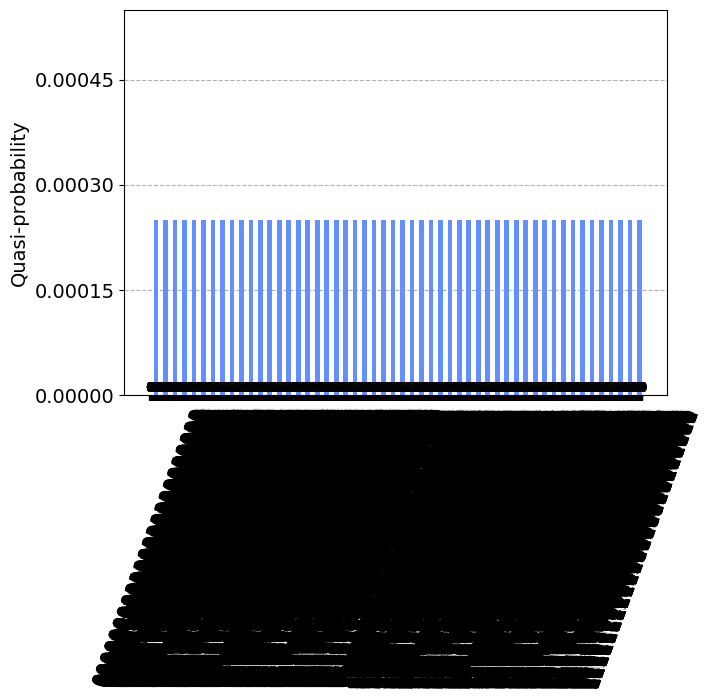

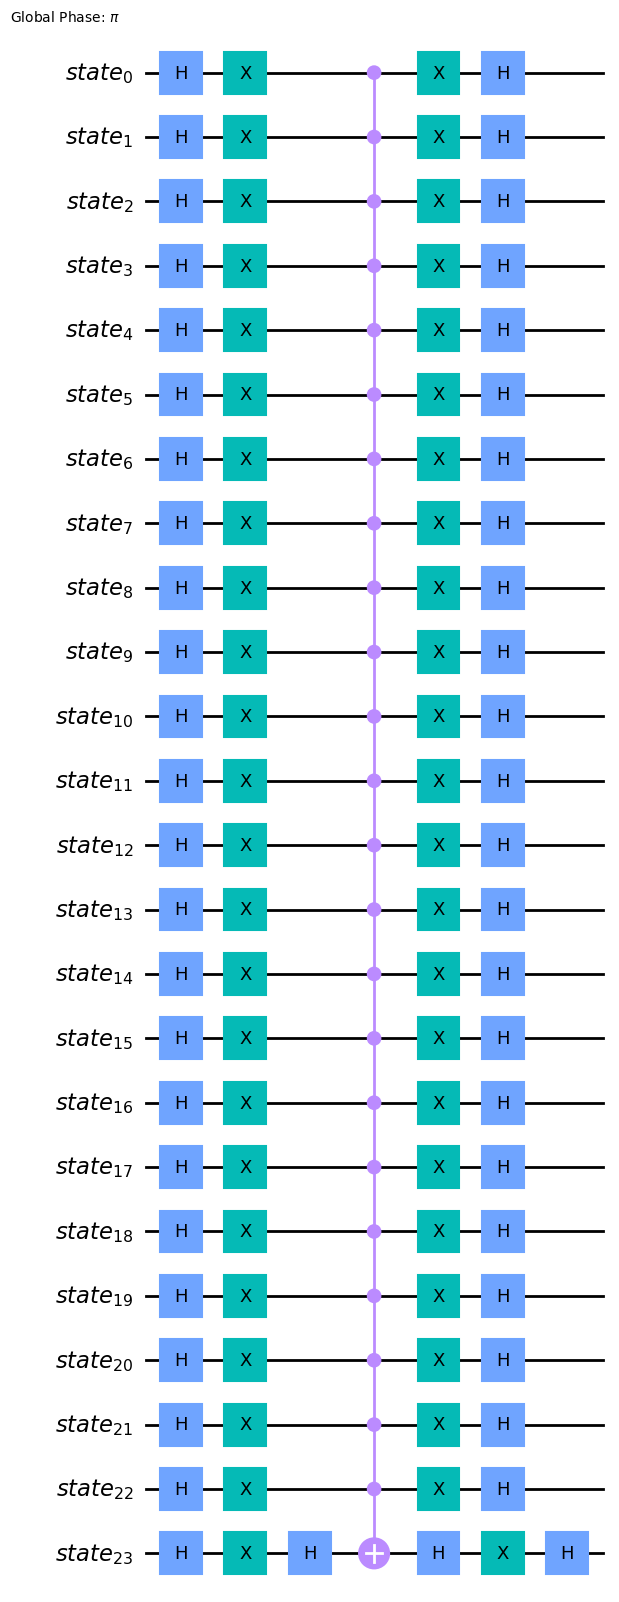

depth 7
width 24
max_mem 3016.16796875 MiB
total_time 517.0513336658478
avg_time 517.0513336658478
std 1.3202526569366455
iter_times [515.7310810089111]
times [(63.39012336730957, 426.2114074230194, 26.129549741744995, 515.7310810089111)]


In [2]:
from qiskit_algorithms import AmplificationProblem, Grover
from qiskit.circuit.library import PhaseOracle
from qiskit.primitives import BackendSampler
from qiskit.tools.visualization import plot_histogram
from qiskit_ibm_runtime import Sampler, Options
from qiskit import IBMQ
from qiskit.visualization import array_to_latex
from qiskit import QuantumCircuit
import time, math
from memory_profiler import memory_usage

count = 1
times = []
iter_times = []
epoch_time = time.time()

def main():
    for i in range(count):
        start_time = time.time()

        IBMQ.load_account()

        oracle = PhaseOracle.from_dimacs_file('data/grafo_regiões_rio_grande_do_sul.cnf')
        # oracle = PhaseOracle.from_dimacs_file('data/graphE.cnf')
        problem = AmplificationProblem(oracle)
        print("num_quibits", problem.grover_operator.num_qubits)
        sampler = Sampler(backend='ibmq_qasm_simulator', options={'max_execution_time': Options._MAX_EXECUTION_TIME})
        # iterations = Grover.optimal_num_iterations(num_solutions=12, num_qubits=oracle.num_qubits) 
        iterations = 1
        print("iterations", iterations)
        grover = Grover(iterations=iterations, sampler=sampler)
        circuit_time = time.time() - start_time
        result = grover.amplify(problem)
        result_time = time.time() - start_time - circuit_time

        # oracle = QuantumCircuit(2)
        # oracle.cz(0, 1, ctrl_state=0)
        # oracle.draw(output='text')

        # print(result.oracle_evaluation, result.top_measurement)
        print(result)
        print(result.circuit_results[0])
        # plot_histogram(result.circuit_results[0], figsize=(60,40))
        display(plot_histogram(result.circuit_results[0]))
        plot_time = time.time() - start_time - circuit_time - result_time
        iteration_time = time.time() - start_time
        times.append((circuit_time, result_time, plot_time, iteration_time))
        iter_times.append(iteration_time)

        # problem.oracle.decompose().draw(output='mpl')
        display(problem.grover_operator.decompose().draw(output='mpl'))
        print("depth", problem.grover_operator.decompose().depth())
        print("width", problem.grover_operator.decompose().width())
        # problem.grover_operator.decompose().qasm(formatted=True)
        # grover.construct_circuit(problem=problem).decompose(reps=2).draw(output='mpl')


        # array = []
        # array.append(('100010001', result.circuit_results[0]['100010001']))
        # array.append(('010001100', result.circuit_results[0]['010001100']))
        # array.append(('100001010', result.circuit_results[0]['100001010']))
        # array.append(('010100001', result.circuit_results[0]['010100001']))
        # array.append(('001100010', result.circuit_results[0]['001100010']))
        # array.append(('001010100', result.circuit_results[0]['001010100']))

        # print(array)
        # result_array = [round(x[1], 4) for x in array]
        # print(result_array)
        #array_to_latex(result_array, prefix="\\text{Statevector} = ", max_size=32)

max_mem = memory_usage(proc=main, interval=1, max_usage=True)
print("max_mem", max_mem, "MiB")

total_time = time.time() - epoch_time
avg_time = total_time / count
print("total_time", total_time)
print("avg_time", avg_time)

var = sum((i - avg_time) ** 2 for i in iter_times) / len(iter_times)
std = math.sqrt(var)
print("std", std)

print("iter_times", iter_times)
print("times", times)

